# Cluster Analysis

### it is a multivariate analysis statistical technique that groups observations on the basis some of their features or variables they are described by
### observations in a dataset can be divided into different groups and this is incredibly powerful
### the goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters

### very common usage in market segmentation and Image segmentation

### Clustering analysis is sometimes a preliminary set for other types of analysis, it helps exploring data and identifying problems

### In image segmentation each color block can be a cluster, each image segment takes an increasing amount of colors/clusters,  clustering in image segmentation also alllows images to be compressed in parts of the analysis process, and this is saving precious hardware resources 

### For object recognition clustering does not perform so well 

## Clustering vs Classification
### For the context of machine learning linear and logistic regression were entitled regression and classification as part of supervised learning.

### Classification is about predicting an output category given input data, clustering is about grouping data points together based on similarities among them and difference from others

### Clustering has no labels so it is unsupervised, when clusters are outputted we don't know if they are in the right number, correct at all or usefull, the output is something we need to name ourselves, so the goal is grouping points together based on similarities among them and difference from others

### The math prerequisites for clustering require the ability to measure the distance between 2 data points and to be able to calculate a centroid

### Euclidian distances are the simpler way to calculate a distance, simply "draw a line" between 2 points-pythagorian theorem, if we parameterize them it will be (x1,y1) and (x2,y2)

### this can be generalized to n-dimentions

## a centroid is the mean position of a group of points (the center of mass when it comes to physics)

# K-Means Clustering

### most popular clustering method
### K stands for the number of clusters we are trying to identify
### a seed is a starting centroid that can be chosen at random or specified by the data scientist


### so
### 1) choose the number of clusters
### 2) specify the cluster seeds
### 3) assign each point on the graph to a seed/centroid
### 4) adjust the centroids
### 5) repeat until all points are properly assigned and the centroids recalculated
### so k means is an iterative process

### About the data set
### https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data
### Content
A data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board cost

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Loading the data

In [2]:
data = pd.read_csv('College.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Plotting the data

### Let's check if there is any clustering when it comes to room and board cost, amount of faculty with PhDs and graduation rates

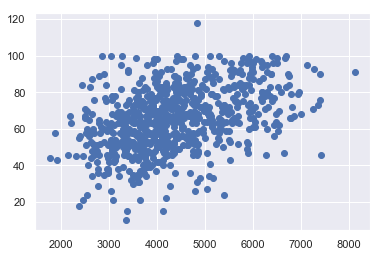

In [18]:
plt.scatter(data['Room.Board'], data['Grad.Rate'])
plt.show()

### Select the features

In [23]:
# iloc- slices df first argument is row index we want to keep 
# second argument column indeces 
# in this case we want to keep all the rows 
x = data[['Room.Board', 'Grad.Rate']]
x

,Room.Board,Grad.Rate
0,3300,60
1,6450,56
2,3750,54
3,5450,59
4,4120,15
5,3335,55
6,5720,63
7,4826,73
8,4400,80
9,3380,52


### Clustering

In [30]:
kmeans = KMeans(3)

In [31]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,

In [33]:
data_clusters = data.copy()
data_clusters['Cluster'] = identified_clusters
data_clusters

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,2
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,2
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,0


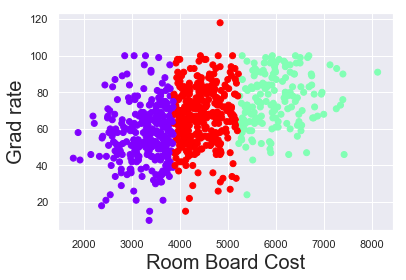

In [35]:
plt.scatter(data['Room.Board'], data['Grad.Rate'], c = data_clusters['Cluster'], cmap = 'rainbow')
plt.xlabel('Room Board Cost', fontsize = 20)
plt.ylabel('Grad rate', fontsize = 20)
plt.show()

### Clustering with categorical features

### including if the school is private or not

In [37]:
data_mapped = data.copy()
data_mapped['Private'] = data_mapped['Private'].map({'Yes': 1, 'No' : 0})
data_mapped

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [38]:
x = data_mapped.iloc[:,1:2]
x

,Private
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


## Clustering

In [39]:
kmeans = KMeans(2)

In [40]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
data_clusters = data_mapped.copy()
data_clusters['Cluster'] = identified_clusters
data_clusters

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
5,Albertson College,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0
6,Albertus Magnus College,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,0
7,Albion College,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,0
8,Albright College,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,0
9,Alderson-Broaddus College,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,0


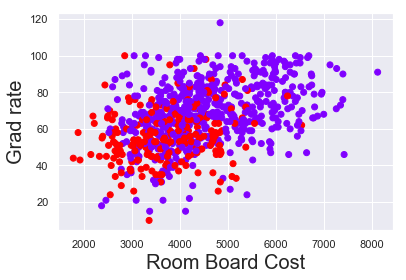

In [47]:

plt.scatter(data['Room.Board'], data['Grad.Rate'], c = data_clusters['Cluster'], cmap = 'rainbow')
plt.xlabel('Room Board Cost', fontsize = 20)
plt.ylabel('Grad rate', fontsize = 20)
plt.show()

### Criterion to select clusters
### the elbow method
### for kmeans minimizing the distance between points in a cluster and maximizing the distance between clusters happens at the same time

### the distance between clusters is the sum of squares or within cluster sum of squares or wcss, it is a measure developed within the anova framework, if we minmize wcss we reach a perfect clustering solution

### WCSS

In [48]:
kmeans.inertia_

1.2712062079329063e-28

In [49]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


In [50]:
wcss

[154.15701415701417,
 1.2712062079329063e-28,
 1.2712062079329063e-28,
 1.2712062079329063e-28,
 1.2712062079329063e-28,
 1.2712062079329063e-28]

### the elbow method

Text(0, 0.5, 'WCSS')

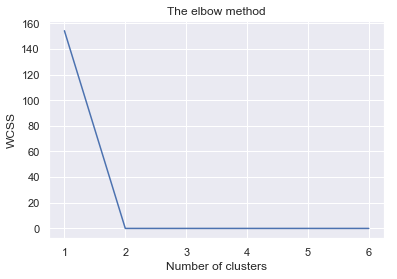

In [51]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### the 2 cluster solution seems to be the best one

## Pros and Cons of KMeans

### Pros: simple to understand, fast to cluster, widely available, easy to implement, always yelds a result

### Cons: we need to pick k (elbow method helps), sensitive to initialization (we pick the centroids and it might be biased by the seeds we pick (we should use k-means ++), sensitive to outliers (the outlier will be its own cluster, we should remove outliers), produces spherical solutions instead if elypsis

## To standardize or not to standardize
### the goal of standardization is to reduce the weight of higher numbers
### standardization tries to put all variables on equal footing 

### A market segmentation example
### data set:https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python#Mall_Customers.csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [66]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [67]:
data['Gender'] = data.Gender.map({'Female':1, 'Male':0})

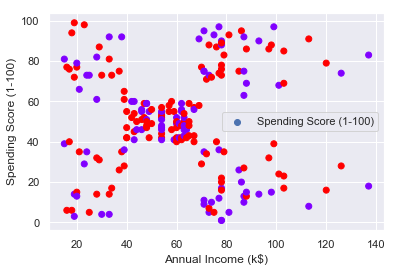

In [70]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c = data['Gender'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [71]:
x = data.copy()

In [72]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

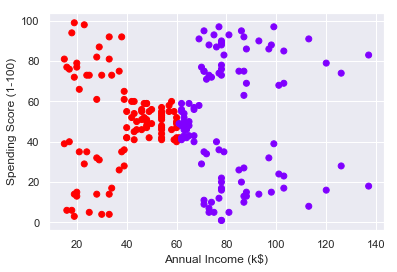

In [75]:
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Standardizing the variables

In [77]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992,  0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 ,  0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847,  0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775,  0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702,  0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 , -1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558,  0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485, -1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413,  0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268,  0.88640526, -1.0

### Elbow method

In [78]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1000.0,
 715.2750473761118,
 573.7345467939024,
 458.22800528197126,
 389.4085104827474,
 339.6744258655538,
 294.4468409315535,
 262.9776228216007,
 222.8773634272097]

Text(0, 0.5, 'WCSS')

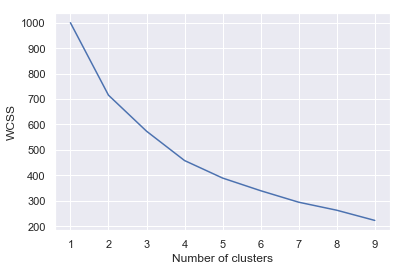

In [79]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Trying out different numbers of clusters

In [80]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [81]:
clusters_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
5,6,1,22,17,76,0
6,7,1,35,18,6,0
7,8,1,23,18,94,0
8,9,0,64,19,3,0
9,10,1,30,19,72,0


### here all the predicted values are based off the standardized data
### even though I am not plotting the standardized data I am plotting standardized solutions

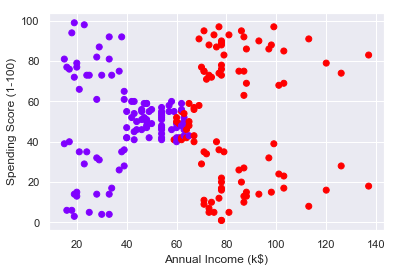

In [83]:
plt.scatter(clusters_new['Annual Income (k$)'],clusters_new['Spending Score (1-100)'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Experimenting with higher number of clusters

In [87]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [88]:
clusters_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2
5,6,1,22,17,76,2
6,7,1,35,18,6,3
7,8,1,23,18,94,2
8,9,0,64,19,3,4
9,10,1,30,19,72,2


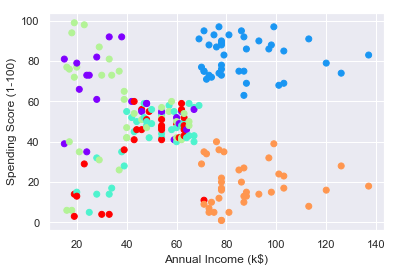

In [86]:
plt.scatter(clusters_new['Annual Income (k$)'],clusters_new['Spending Score (1-100)'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### it seems like overal the data is divided in:
### Low income, low spending score
### Low income, high spending score
### Mid income, medium spending score
### High income, low spending score
### High income, high spending score

### Data analysis can be:
### Exploratory: get acquinted with the data, search for patterns, plan (data visualization, descriptive statistics and clustering
### confirmatory: explain a phenomenon, validate, hypothesis testing and regression analysis, clustering can also be used her for confirmation of correct grouping, but classification is far more precise
### explanatory


## Types of Clustering 
### Clustering was developed by an anthropologist
### we can have flat and hirarchical clustering 
### taxonomy is an example of hierarchical clustering
### hierarchical clustering can be agglomerative (bottom up) or divisive (top down)
### Kmeans allows divisive agglomeration to be defined

### in agglomerative hierarchical clustering each data point starts by being its own entry, using similarity measure like eucledian distances we start by clsutering them together reaching an N-1 cluster solution and you go from there until all the observations are in a single cluster-the resulting plot is a dendogram

### on the data set
### https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

In [93]:
data = pd.read_csv('cancer_diag.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


### cleaning up data

In [94]:
data.drop(["Unnamed: 32"], axis = 1, inplace = True)

### checking how data looks like

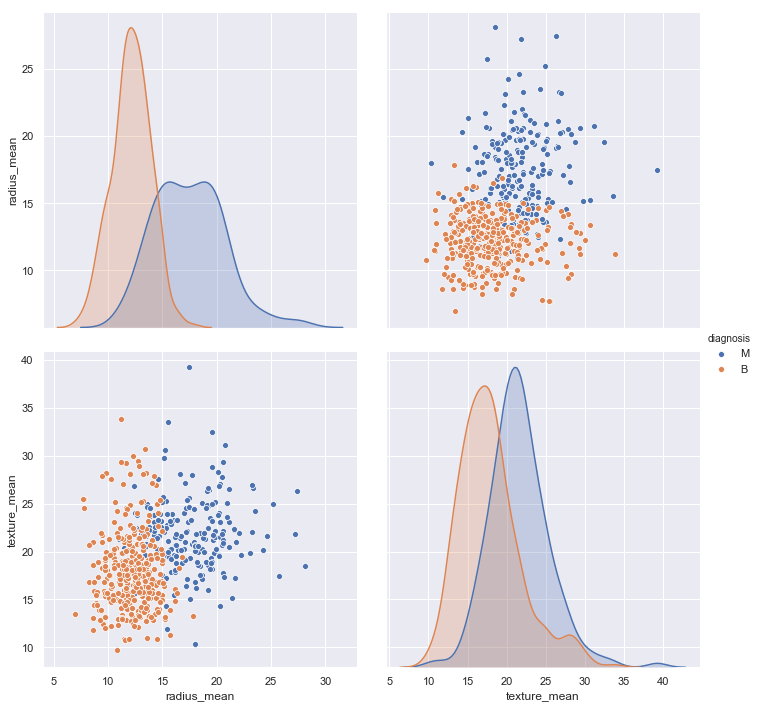

In [95]:
sns.pairplot(data.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

### checking how data looks like without diagnosis label

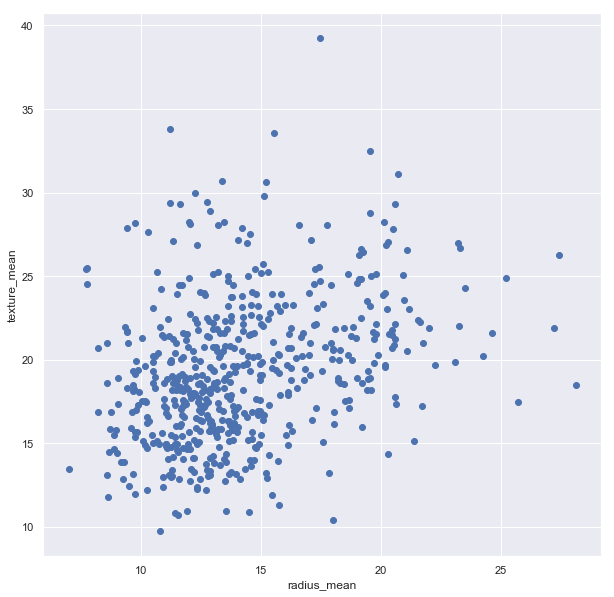

In [96]:
data_labelfree = data.drop(["diagnosis"], axis = 1)
plt.figure(figsize = (10, 10))
plt.scatter(data_labelfree["radius_mean"], data_labelfree["texture_mean"])
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

### going the Kmeans way

In [97]:
x = data_labelfree.copy()

kmeans = KMeans(2)
kmeans.fit(x)

clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

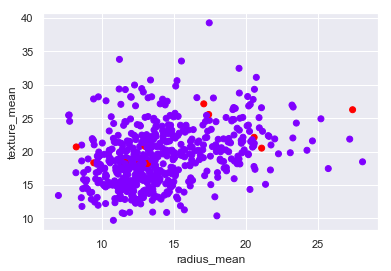

In [99]:
plt.scatter(clusters['radius_mean'],clusters['texture_mean'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

### elbow method

In [100]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1000.0,
 715.2750473761118,
 573.7345467939024,
 458.240336652548,
 389.505419355936,
 335.03908547413323,
 294.52641021042734,
 254.60034705912753,
 222.6908518801376]

Text(0, 0.5, 'WCSS')

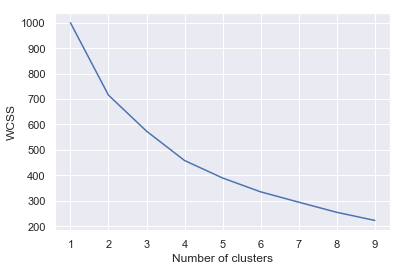

In [101]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Seaborn approach

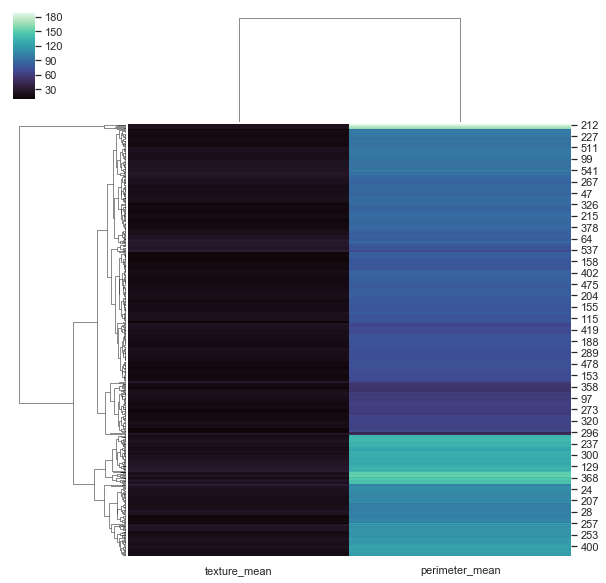

In [108]:
x_scaled = data_labelfree.copy()
x_scaled = x_scaled.iloc[:, 2:4]
sns.clustermap(x_scaled, cmap = 'mako')


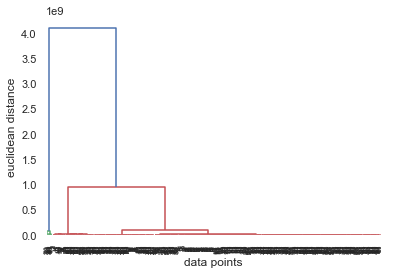

In [114]:
from scipy.cluster.hierarchy import linkage,dendrogram
data_labelfree = data.drop(["diagnosis"], axis = 1)
merg = linkage(data_labelfree, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [115]:
from sklearn.cluster import AgglomerativeClustering
data_labelfree = data.drop(["diagnosis"], axis = 1)
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data_labelfree)
data_labelfree["label"] = cluster

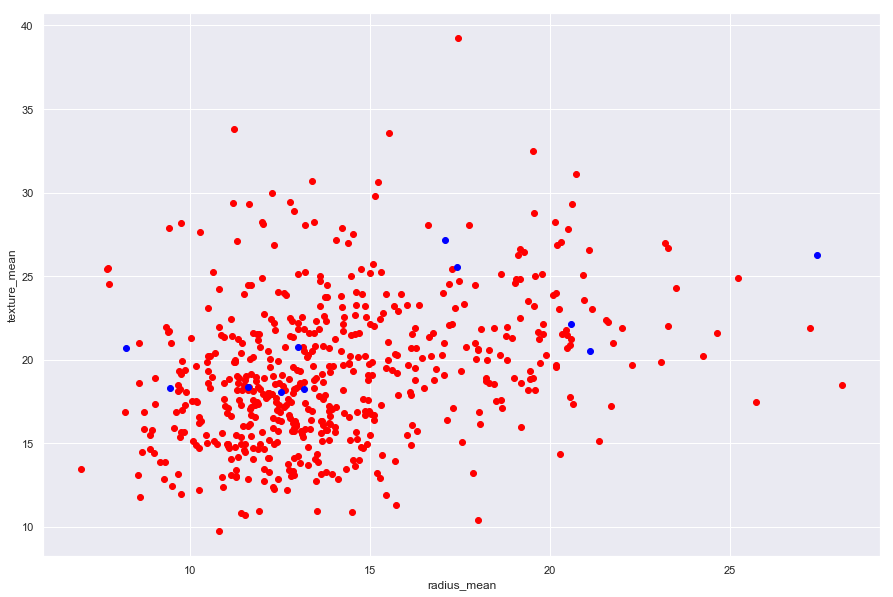

In [116]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(data_labelfree["radius_mean"][data_labelfree.label == 0], data_labelfree["texture_mean"][data_labelfree.label == 0], color = "red")
plt.scatter(data_labelfree["radius_mean"][data_labelfree.label == 1], data_labelfree["texture_mean"][data_labelfree.label == 1], color = "blue")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()